# Brief intro to Natural Language Processing (NLP)


## <font color=darkslateblue> TL;DR $\rightarrow$ NLP involves converting words into numbers and doing math on these numbers in order to identify relationships between the words and documents they live in.
</font>


In [1]:
#from IPython.display import Image, display
import os
from glob import glob
import pandas as pd

cur_dir = os.path.abspath(os.curdir)
image_dir = os.path.join(cur_dir,'images')
data_dir = os.path.join(cur_dir,'data')
output_dir = os.path.join(cur_dir,'output')

<img src='images/library.jpg'  height="800", width = '800'>
<img src="images/number_bits.jpg" height="600", width="600">

## Why NLP?

It is a very broad domain that deals with analyzing and understanding human text and words. Some areas of application include the following:

* text classification/clustering (including spam detection & sentiment analysis)
* machine translation
* language modeling (e.g. predicting the next word given the previous words)
* summarizing blocks of text (to find the main topics/topic sentences or concepts) 
* caption generation
* speech recognition 
* question answering.

<img src='images/words-bis.jpg' alt='WORDS HAVE POWER' width="600", height ="600"> 

Additionally, the input data for NLP is generally unstructured meaning that some of our favorite, go-to tools and approaches won't work without some pre-processing steps and/or thought. 


## My experiences with NLP

Over the years I've used NLP/text mining in several projects including the following.
        
* Characterization of the articles written and posted on a social media site and assign topics to them.
* Identification of Entities (People, Places, Companies, etc.) 
    - used these to connect articles and recommend content.
    - used these to analyze what the articles were being written on in a seasonal way
    - used these to identify what brands the authors were writing about
* Assess sentiment and trends in articles.


* Digest/summarize/group weekly status reports.
* Analyze claims notes in order to identify common features in claims and claims processing as well as trends over time.

<img src="images/SFclaimsClassifier.png" height="600" width="600" alt="Missing file">
        

## <font color= darkslateblue> CLEARLY this is _too  much_ to fully cover in a short talk. </font>

### Goals for today. 
1. Provide an overview of some concepts, terms and methods.
2. Illustrate through a few examples.


### First some key terms/phrases

* _Tokenization_ (breaking text into smaller pieces: i.e. words and sentences)


* _Stopwords_ (non-important words that should be identified and ignored)


* _n-grams_ (groupings of adjacent words) 
    - 1-grams are single words, 2-grams (bi-grams) are 2 consecutive words, 3-grams are three consecutive words etc.
    - a simple way to capture some of the frequent collocalization of specific words/context
    - computational complexity grows rapidly with increasing _n_

  
* _Stemming_ & _Lemmatization_ (how to collapse similar words to a single representation)
    - stemming is rule-based (such as stripping off suffixes)
    - lemmatization is vocabulary + grammar based (requires passing through a set of steps to id the root form of the word)
    - Often you'll have too many tokens in your document to make sense of things. This is one way to reduce the dimensionality.
    - Common examples include plurals or verbs of different tenses
    

* _Part-of-Speech (POS) Tagging_  (identifying and assigning this meta-data to the words in a sentence)
    - adds information to the document; you can think of it as an additional, derived feature
    - helps distinguish different uses of a particular word
 
 

* _Named Entity Recognition (NER)_ (identifying people/places/companies/etc.)
    - can be thought of as an additional feature and means to understand what a document is about.


* _corpus_ (a set of documents)
    - the input; can be split into test and training sets for ML jobs

## <font color=indianred> Start Simply </font>: Represent a set of documents (_corpus_) by a vector space defined by the words present.

* Use the words contained within a set of documents to define a basis set (i.e. set of vectors assumed to be orthogonal to one another) in order to locate a given document within in this resulting (word-based) vector space.
    - so if you have $N$ unique words in your set of $M$ documents then your vector space will have a dimensionality of $N$.
    
* In this approach we're ignoring each word's context and using unigrams. This is the so-called __Bag-of-Words__ approach.

* I'm relying heavily on `python`, especially `sklearn` package.

### Toy example with limited vocabulary.
Consider a simple example where there are only 3 words in your set of documents: 'Airplane','Boat','Car' and every sentence or document is constructed only out of these words.


    
To convert these to an orthogonal basis vector set you can explicitly define
<div class="code-base"><pre class="highlight"><code>
Airplane => [1,0,0]
Boat => [0,1,0]
Car => [0,0,1]
</code></pre></div>

Then you map a given sentence or document into this __vector space__. 
<img src="images/vectorSpace.png" height="200", width="200">



In [2]:
toy_corpus = ["Boat Airplane Airplane Boat Car",
              "Car Airplane Car Boat Car Airplane",
              "Car Car Car Airplane Car Airplane Airplane",
              "Boat Airplane Boat Boat Boat Boat Airplane",
              "Car Car Car Boat Car Airplane",
              "Boat Car Car Boat Car Boat",
              "Car Airplane Boat Airplane Boat Car Airplane"]


The easiest way to do this is to define the number of occurrences of each word as the value along that axis for each word.  For example the following 'sentences' can be expressed as. 

<div class="code-base"><pre class="highlight"><code>
s0 = "Boat Airplane Airplane Boat Car" => [2,2,1]
s1 = "Car Airplane Car Boat Car Airplane" => [2,1,3]
s2 = "Car Car Car Airplane Car Airplane Airplane" => [3,0,4]
s3 = "Boat Airplane Boat Boat Boat Boat Airplane" => [2,5,0]
s4 = "Car Car Car Boat Car Airplane" => [1,1,4]
s5 = "Boat Car Car Boat Car Boat" => [0,3,3]
s6 = "Car Airplane Boat Airplane Boat Car Airplane" => [3,2,2]
</code></pre></div>

Within this framework, the similarity between two known documents (or a query for a document given a corpus) can be measured by the similarity of these vectors (i.e. the distance). Typically cosine similarity is used for this distance. 

This vectorization is implemented in `scikit-learn's CountVectorizer`

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
toy_vectorizer = CountVectorizer()
#print(vectorizer)
toy_vectorizer.fit(toy_corpus)
corpus_vec=toy_vectorizer.transform(toy_corpus).toarray()
print(corpus_vec)

[[2 2 1]
 [2 1 3]
 [3 0 4]
 [2 5 0]
 [1 1 4]
 [0 3 3]
 [3 2 2]]


## visualize:

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from cycler import cycler
import numpy as np
from mpl_toolkits import mplot3d
import seaborn as sns
sns.set()


#### the initial positions of our sentences in this space

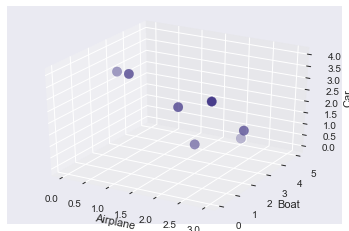

In [5]:

fig = plt.figure()
ax = plt.axes(projection='3d')

x = [c[0] for c in corpus_vec]
y = [c[1] for c in corpus_vec]
z = [c[2] for c in corpus_vec]
ax.scatter3D(xs=x,ys=y,s=90,zs=z, color='darkslateblue')

ax.set_xlabel('Airplane')
ax.set_ylabel('Boat')
ax.set_zlabel('Car',rotation=90);


## To compare similarities between 'documents' or sentences: measure distance between pairs of vectors

In [6]:
from sklearn import metrics
toy_sim_mat = metrics.pairwise.cosine_similarity(corpus_vec)

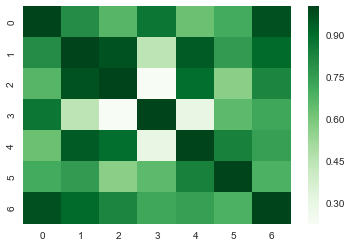

In [7]:
sns.heatmap(toy_sim_mat,cmap="Greens") 

In [8]:
toy_sim_mat[2][3], toy_corpus[2], toy_corpus[3], corpus_vec[2],corpus_vec[3]   # most dissimilar

(0.22283440581246222,
 'Car Car Car Airplane Car Airplane Airplane',
 'Boat Airplane Boat Boat Boat Boat Airplane',
 array([3, 0, 4], dtype=int64),
 array([2, 5, 0], dtype=int64))

In [9]:
toy_sim_mat[1][2], toy_corpus[1], toy_corpus[2], corpus_vec[1], corpus_vec[2] #most similar

(0.9621404708847279,
 'Car Airplane Car Boat Car Airplane',
 'Car Car Car Airplane Car Airplane Airplane',
 array([2, 1, 3], dtype=int64),
 array([3, 0, 4], dtype=int64))


## Some possible problems with this <font color=indianred> Bag of Words</font> approach. 
There are several issues with this approach when you consider the entire English dictionary. 

* (1) Typically there are words that are very common in general, so they appear in lots of documents. (“the”, “and”, “or” etc..)
    * these are typically referred to as _stopwords_ 
    

* (2) Within a given document or corpus, there are usually additional high frequency words that don't contribute much discriminating information between documents or sentences. 
    * These words can overwhelm the mathematical operations required to determine similarities.
    * For example in an article about March Madness words like NCAA or basketball or college don't provide additional information. We may not want to count repeating words as much.  
  
  
* (3) When words are used as atomic types for the basis of the vector space, they have no semantic relations (the similarity between them is zero, since they are perpendicular to each other). However, in reality we know that words can be similar in meaning, or even almost identical synonyms.
    * Thus the __bag of words__ moniker.
    
    
* (4) And of course syntactic structure is completely lost.

# A more complicated example the text of a book. 
* Utilize [Project Gutenberg](https://www.gutenberg.org/wiki/Main_Page) an online library of free eBooks.
* Examine a book to understand what this analysis looks like on a bigger corpus.
* Observe differences between some packages and pre-processing steps.

A couple of helper functions I wrote to download, ingest the raw_text and split it into chapters follows.

In [10]:
def load_pg_text(my_file):
    try:
        with open(my_file,'rb') as f:
            text=f.read()
            raw_text=text.decode('utf-8')
    except UnicodeDecodeError:
        with open(my_file) as f:
            raw_text=f.read()
            
    # first id the title & author
    tmp = [a.strip('\r') for a in raw_text.split('\n')]
    lines_to_find = ['*** START OF THIS PROJECT GUTENBERG', '*** END OF THIS PROJECT GUTENBERG']
    
    ll_to_find = [line for line in tmp if line.startswith(lines_to_find[0]) or line.startswith(lines_to_find[1])]
    try:
        start_idx = tmp.index(ll_to_find[0])
        end_idx = tmp.index(ll_to_find[1])
        title_str = ll_to_find[0].split('EBOOK')[-1].rstrip('***').strip(' ')
        if title_str == 'AROUND THE WORLD IN 80 DAYS':
            title_str=title_str.replace('80','EIGHTY')
        elif title_str == 'A JOURNEY TO THE INTERIOR':
            title_str=title_str.replace('TO THE','INTO THE')
            
        title_idx = [k for k,line in enumerate(tmp) if line.startswith(title_str)]
        try:
            title_index = max(title_idx) 
        except ValueError:
            print("**WARNING** starting at first line; may have excessive intro material")
            title_index = start_idx+1
        
    except IndexError:
        start_idx = [k for k, line in enumerate(tmp) if line.startswith('*END THE SMALL PRINT!')][0]
        end_idx = [k for k,line in enumerate(tmp) if line.startswith('End of the Project Gutenberg Etext')][-1]-1
        #title_str=" ".join([a for a in tmp[7:12] if a != ""])
        title_index = start_idx    
   
    try:
        last_index = next(i for i,v in zip(range(len(tmp)-1,-1,-1), reversed(tmp)) if 'THE END' in v)
    except StopIteration:
        last_index = end_idx-1
        
    return tmp[title_index:last_index]


class Chapter(object):
    """A class to contain chapters from Project Gutenberg text files"""
    def __init__(self, name, title, text, author, book_id, chapter_index, book):
        self.name=name
        self.title=title
        self.text=text
        self.author=author
        self.book_id=book_id
        self.chapter_index=chapter_index
        self.bookname=book
        

def split_into_chapters(text, book_id, key_word='Chapter ', authorname=None, bookname=None):
    if authorname is None:
        authorname = 'unknown'
    if bookname is None:
        bookname='unknown'
    chapter_idx = [k for k,line in enumerate(text) if key_word in line ]
    #print(len(chapter_idx))
    if key_word == 'THE STRAND MAGAZINE':
        chapter_idx = [c+6 for c in chapter_idx]
    else:
        key_word+=' '
        
    chapters=[] 
    for i,a in enumerate(chapter_idx):
        if i != len(chapter_idx)-1:
            b = chapter_idx[i+1]-1
        else: 
            b = len(text)
            
        chapter_name = text[a]
        chapter_title = text[a+2] #TOD improve this
        chapter_text = ' '.join([line.replace("\'","'") for line in text[a+3:b] if not line.startswith("[Illustration:")]) #drop illustration lines
        my_chapter = Chapter(chapter_name, chapter_title, chapter_text, authorname, book_id, i, bookname)
        chapters.append(my_chapter)
        
    return chapters


## Consider an example: <font color=darkslateblue> Around the World in 80 Days Text </font> 
* load the file & parse it
* split it into chapters (throw away other parts of the eBook like table of contents, publisher info, etc.)
* rejoin everything into a single corpus

In [11]:
raw_text=load_pg_text('data/103.txt')
chapters= split_into_chapters(raw_text,103, key_word='Chapter ', authorname='Verne')
print("We split this book into {n} chapters.".format(n=len(chapters)))
corpus_all_in_one = ' '.join([chap.text for chap in chapters])
print("The entire book has a length of {n} characters.".format(n=len(corpus_all_in_one)))

We split this book into 37 chapters.
The entire book has a length of 364686 characters.


# First consider all the words in this book

## Must <font color=darkslateblue> tokenize</font> (i.e. split into words) 

* the methods to tokenize exist in a number of python packages including `nltk`, `sklearn`, `spaCy`, & the standard library.
* you can also build your own (probably using regex).

### Let's start by using `nltk` and a simple word count using `collections.Counter`

We are interested in finding:
1. how many times a word occurs across the whole corpus (total number of occurrences)
2. How many documents a word occurs in

In [12]:
corpus_all_in_one[:100]

'THE ONE AS MASTER, THE OTHER AS MAN   Mr. Phileas Fogg lived, in 1872, at No. 7, Saville Row, Burlin'

In [13]:

from nltk.tokenize import word_tokenize

try:  # py3
    all_tokens = [t for t in word_tokenize(corpus_all_in_one)]
except UnicodeDecodeError:  # py27
    all_tokens = [t for t in word_tokenize(corpus_all_in_one.decode('utf-8'))]

print("Total number of words: {} in {} unique tokens.".format(len(all_tokens), len(set(all_tokens))))
from collections import Counter
total_term_frequency = Counter(all_tokens)

Total number of words: 75754 in 7467 unique tokens.


In [14]:
all_tokens[:18]

['THE',
 'ONE',
 'AS',
 'MASTER',
 ',',
 'THE',
 'OTHER',
 'AS',
 'MAN',
 'Mr.',
 'Phileas',
 'Fogg',
 'lived',
 ',',
 'in',
 '1872',
 ',',
 'at']

### Aside
In 1935, linguist George Zipf noted that in any big text, the nth most frequent word appears with a frequency of about 1/n of the most frequent word. He get's credit for Zipf's Law, even though Felix Auerbach made the same observation in 1913. If we plot the frequency of words, most common first, on a log-log plot, they should come out as a straight line if Zipf's Law holds. 

In [15]:
def plot_ordered_term_frequency(term_freq):
    M = term_freq.most_common(1)[-1][-1]#['the']
    plt.yscale('log'); plt.xscale('log'); plt.title('Frequency of n-th most frequent word and 1/n line.')
    plt.plot([c for (w, c) in term_freq.most_common()])
    plt.plot([M/i for i in range(1, len(term_freq)+1)]);
    plt.ylabel('Word Frequency')
    plt.xlabel('Word index ordered by frequency');
    return

Here we see that it is a fairly close fit:

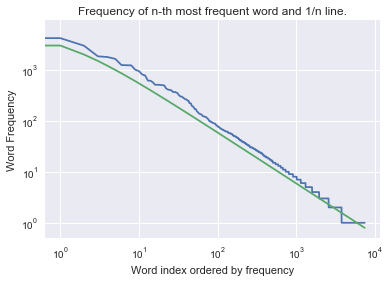

In [16]:
plot_ordered_term_frequency(total_term_frequency)

In [17]:
for word, freq in total_term_frequency.most_common(20):
    print("{w}\t{f}".format(w=word, f=freq))

,	5945
the	4151
.	2947
and	1829
of	1768
to	1628
``	1232
''	1223
a	1214
was	995
in	938
his	807
he	770
;	611
Fogg	608
at	568
not	507
with	507
The	506
that	501


### Wait a lot of these tokens aren't words (punctuation) or are just simple (non-informative words)
* ah we need to remove these stopwords and punctuation marks.
* also this formuation of words as strings is case sensitive. Let's lowercase everything and reasses
* try again, this time splitting into sentences first

In [18]:
from nltk.tokenize import sent_tokenize
import string

all_sentences = sent_tokenize(corpus_all_in_one)
print("{N} sentences found.".format(N=len(all_sentences)))

3655 sentences found.


In [19]:

tokens = [word for sent in sent_tokenize(corpus_all_in_one) for word in word_tokenize(sent)]
# remove words that are just punctuation
no_punct = list(filter(lambda word: word not in string.punctuation, tokens))
# lowercase everything so 
lc_tokens = [word.lower() for word in no_punct]
print("Total number of words: {} in {} unique tokens.".format(len(lc_tokens), len(set(lc_tokens))))
lc_total_term_frequency = Counter(lc_tokens)


Total number of words: 65476 in 6931 unique tokens.


In [20]:
for word, freq in lc_total_term_frequency.most_common(20):
    print("{w}\t{f}".format(w=word, f=freq))


the	4666
and	1894
of	1783
to	1647
a	1294
``	1232
''	1223
was	1007
he	987
in	978
his	840
at	634
fogg	611
it	577
that	525
on	522
not	519
with	512
had	511
as	437


In [21]:
from nltk.corpus import stopwords
print(len(stopwords.words('english')))

print(stopwords.words('english'))
stop_list = stopwords.words('english')+["--","``","''","...",'mr.',"'s","“","”","'nt","'ll","'re"]



179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

In [22]:
#stop_list = stopwords.words('english') + list(my_punct)+["--","``","''","..."]

tokens_no_stop = [token for token in lc_tokens if token not in stop_list]

total_term_frequency_no_stop = Counter(tokens_no_stop)
ntokens = len(total_term_frequency_no_stop.keys())
print("This reduces our corpus to containing {m} words in {n} unique tokens.".format(m=len(tokens_no_stop),n=ntokens))
for word, freq in total_term_frequency_no_stop.most_common(20):
    print("{w}\t{f}".format(w=word, f=freq))

This reduces our corpus to containing 31536 words in 6801 unique tokens.
fogg	611
passepartout	399
would	286
fix	245
phileas	222
said	192
one	168
could	140
aouda	136
time	126
master	123
upon	119
train	119
sir	103
two	101
hundred	97
replied	93
steamer	91
hours	90
thousand	88


In [23]:
# wrap this all into a function
def nltk_tokenize(text, stop_words=stop_list):
    # tokenize
    tokens = [word for sent in sent_tokenize(text) for word in word_tokenize(sent)]
    # remove words that are just punctuation
    no_punct = list(filter(lambda word: word not in string.punctuation, tokens))
    # lowercase everything 
    lc_tokens = [word.lower() for word in no_punct]
    # remove stopwords
    tokens_no_stop = [token for token in lc_tokens if token not in stop_words]
    
    return tokens_no_stop
    




In [24]:
by_chap_tokens = []
by_chap_counts = []
for chapter in chapters:
    ctokens = [t for t in nltk_tokenize(chapter.text)]
    
    #print(chapter.name,len(ctokens))
    by_chap_tokens.append(ctokens)
    chapCounter = Counter(ctokens)
    by_chap_counts.append(chapCounter)


In [25]:
def get_chapter_stats(chapter_tokens, chapters):
    data = []
    for k, c in enumerate(chapters):
        nwords = len(by_chap_tokens[k])
        ntokens = len(set(by_chap_tokens[k]))
        name = c.name
        #nchar = 
        data.append([nwords,ntokens,name])
    df = pd.DataFrame(data, columns=['words','tokens','name'])
    return df
                    

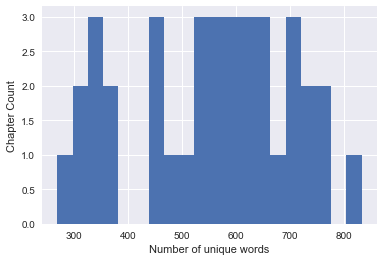

In [26]:
chp_stats =get_chapter_stats(by_chap_tokens, chapters)
chp_stats.tokens.hist(bins=20)
plt.xlabel('Number of unique words');
plt.ylabel('Chapter Count');

In [27]:
chp_stats

,words,tokens,name
0,728,533,Chapter I
1,573,447,Chapter II
2,1029,622,Chapter III
3,491,344,Chapter IV
4,490,359,Chapter V
5,660,454,Chapter VI
6,389,270,Chapter VII
7,516,356,Chapter VIII
8,826,578,Chapter IX
9,817,587,Chapter X


## Question. Can we distinguish or cluster the chapters based upon the words in them?

In [28]:
chap_top5 =[]
chap_top5freq =[]
for k,c in enumerate(by_chap_counts):
    top5 = []
    freqtop5 = []
    for word, freq in c.most_common(5):
        top5.append(word)
        freqtop5.append(freq)
    chap_top5.append(top5)
    chap_top5freq.append(freqtop5)

In [29]:
chap_top5

[['fogg', 'phileas', 'saville', 'row', 'club'],
 ['passepartout', 'fogg', 'one', 'master', 'would'],
 ['fogg', 'stuart', 'phileas', 'thousand', 'said'],
 ['passepartout', 'fogg', 'master', 'good', 'twenty'],
 ['fogg', 'phileas', 'would', 'reform', 'club'],
 ['fix', 'suez', 'consul', 'steamer', 'mongolia'],
 ['consul', 'passport', 'october', 'fix', 'fogg'],
 ['fix', 'passepartout', 'london', 'monsieur', 'watch'],
 ['bombay', 'mongolia', 'fix', 'fogg', 'steamer'],
 ['bombay', 'fogg', 'india', 'calcutta', 'passepartout'],
 ['fogg', 'sir', 'francis', 'passepartout', 'would'],
 ['would', 'fogg', 'sir', 'francis', 'guide'],
 ['fogg', 'guide', 'sir', 'francis', 'parsee'],
 ['passepartout', 'fogg', 'would', 'phileas', 'guide'],
 ['fogg', 'passepartout', 'judge', 'said', 'phileas'],
 ['hong', 'kong', 'would', 'fix', 'fogg'],
 ['passepartout', 'fix', 'fogg', 'aouda', 'master'],
 ['fogg', 'would', 'passepartout', 'steamer', 'hong'],
 ['passepartout', 'fix', 'fogg', 'said', 'master'],
 ['fogg', 'f

In [30]:
top5overChap = list(set([item for sublist in chap_top5 for item in sublist]))

In [31]:
n_top_words = len(top5overChap)
n_top_words

63

In [32]:
top5counts = np.zeros((len(chapters),n_top_words))
for j, chp in enumerate(chap_top5):
    for k,word in enumerate(chp):
        val = chap_top5freq[j][k]
        i = top5overChap.index(word)
        #print(j,k,i, word, val)
        top5counts[j][i]=val

['club', 'fogg', 'saville', 'phileas', 'row']
['suez', 'consul', 'mongolia', 'steamer', 'fix']
['fogg', 'bombay', 'mongolia', 'steamer', 'fix']
['passepartout', 'fogg', 'sledge', 'omaha', 'time']


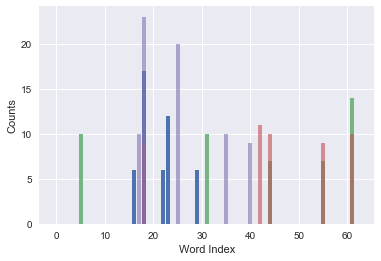

In [33]:
plt.bar(x=range(n_top_words), height=top5counts[0])
plt.bar(x=range(n_top_words), height=top5counts[5], alpha=0.8)
plt.bar(x=range(n_top_words), height=top5counts[8], alpha=0.6)
plt.bar(x=range(n_top_words), height=top5counts[30], alpha=0.6)
print([top5overChap[a] for a in np.where(top5counts[0]>0)[0]])
print([top5overChap[a] for a in np.where(top5counts[5]>0)[0]])
print([top5overChap[a] for a in np.where(top5counts[8]>0)[0]])
print([top5overChap[a] for a in np.where(top5counts[30]>0)[0]])
plt.ylabel('Counts');
plt.xlabel('Word Index');


# To approach this more seriously we would want to address the relative importance of our words (i.e. issues (1) and (2) above. 

## Enter <font color=indianred> TF-IDF</font> 

### Term Frequency Inverse Document Frequency (tf-idf) is a good way to address the concerns of overcounting or overweighting certain words in corpus.

Given $t$ represents a term, $d$ represents a document and $D$ is the set of all documents, the general equation is

\begin{equation}
tf\mbox{-}idf(t,d,D) = tf(t,d) \cdot idf(t,D)
\end{equation}

* TF: Term Frequency 

How often does a word occur? TF simply counts the number of times a word is in a document -- the most frequently occurring words (especially after stop-words have been removed) give some insight into the content of a particular document. 

If the documents you are comparing are of different lengths you probably need to adjust the simplest version (raw count) by document length.  


* IDF: (Inverse document frequency)

IDF measures how much information a given word provides. The idea is to __penalize__ the total count of a word in a document by how often it appears in all of the documents. The higher this number the less valuable the word is because it contains less information that can distinguish the document. In the extreme case, where the word appears in large fraction of the documents, usually it is even better to completely eliminate the count. These are the stopwords, and/or corpus-specific stopwords.

A good heuristic is \begin{equation} 
idf(t,D) = \log\frac{N}{1+n_t}
\end{equation}
where $N$ is the number of documents ($N=|D|$) and $n_t$ is the number of documents where term $t$ appears in it. 

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()


In [35]:
chap_corpus = [" ".join(a) for a in by_chap_tokens]

In [36]:
vectorizer.fit(chap_corpus)
chap_corp_vec = vectorizer.transform(chap_corpus)

In [37]:
chap_corp_vec.shape # number of chapters by vocabulary size

(37, 6637)

In [38]:

from sklearn import cluster
def cluster_text(X,nclusters=6, random_state= 1155, show_plot=True):
    clstr = cluster.KMeans(random_state=random_state, n_clusters=nclusters)
    clstr.fit(X)
    if show_plot:
        obs_per_cluster = pd.Series(clstr.labels_).value_counts()
        obs_per_cluster.plot(kind="bar",color='cadetblue')
        plt.ylabel('Number of Observations')
        plt.xlabel('Cluster ID')
        plt.show()
    return clstr

In [39]:
def extract_tfidf_term_fractions(clusters,vectorizor,my_matrix,n_terms = 100):
    vocab = vectorizor.get_feature_names()
    ## get the rows that correspond to a given cluster_label:
    #clust_id = 1
    nclusters = clusters.n_clusters
    
    clst_labels = pd.Series(clusters.labels_)
    nobs = len(clst_labels.value_counts())
    #print(nclusters,nobs)
    
    if nobs < nclusters:
        nclusters=nobs
    
    
    for k in range(nclusters):
        obs_idx = clst_labels[clst_labels == k].index.tolist()
        # reduce to the average value for each word
        vect_contributions = my_matrix[obs_idx].mean(axis=0).tolist()[0]
        df_vect = pd.Series(vect_contributions,index=vocab)
        if len(vocab)>n_terms: 
            df_vect.sort_values(ascending=False,inplace=True)
        # just print all of them as they are
        #    
        #    df_vect.plot(kind='bar',color='steelblue',rot=45)
        #else:
        df_vect[:n_terms].plot(kind='bar',color='steelblue',rot=45)
        plt.title("Top terms from Cluster %d (n = %d)" %(k,len(obs_idx)),fontsize=20)
        plt.ylabel('Mean TFIDF value')
        plt.show()    
            
            
    return

def plot_single_cluster_tfidf_terms(clusters,vectorizor,my_matrix,n_terms = 100, cluster_id =0):
    vocab = vectorizor.get_feature_names()
    ## get the rows that correspond to a given cluster_label:
    
    clst_labels = pd.Series(clusters.labels_)
       
    #for k in range(nclusters):
    obs_idx = clst_labels[clst_labels == cluster_id].index.tolist()
        # reduce to the average value for each word
    vect_contributions = my_matrix[obs_idx].mean(axis=0).tolist()[0]
    df_vect = pd.Series(vect_contributions,index=vocab)
    if len(vocab)>n_terms: 
        df_vect.sort_values(ascending=False,inplace=True)
        # just print all of them as they are
        #    
        #    df_vect.plot(kind='bar',color='steelblue',rot=45)
        #else:
    df_vect[:n_terms].plot(kind='bar',color='darkslateblue',rot=45)
    plt.title("Top terms from Cluster %d (n = %d)" %(cluster_id,len(obs_idx)),fontsize=20)
    plt.ylabel('Mean TFIDF value')
    plt.show()    
            
            
    return

In [40]:
def create_and_score_clusters(vector, min_size=2,max_size=20,metric='silhouette',show_plot=True,**kwargs):
    cluster_score_info ={}
    v2 = vector.dot(vector.T)
    for k in range(min_size,max_size,1):
        tmp_cluster = cluster_text(vector, nclusters=k, show_plot=False, **kwargs)
        if metric == 'silhouette':
            cluster_score_info[k]=metrics.cluster.silhouette_score(v2, labels=tmp_cluster.labels_)
    if show_plot:
        pair = sorted(cluster_score_info.items()) # = [(x,y) for x,y in a.items()]
        x,y = zip(*pair)
        plt.plot(x,y)
        plt.xlabel('Number of Clusters')
        plt.ylabel('Cluster Score')
        
    return cluster_score_info

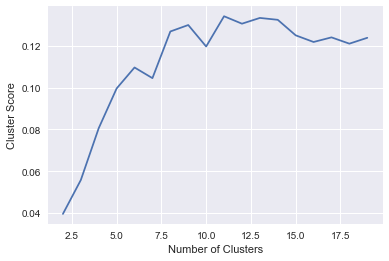

In [41]:
a = create_and_score_clusters(chap_corp_vec)

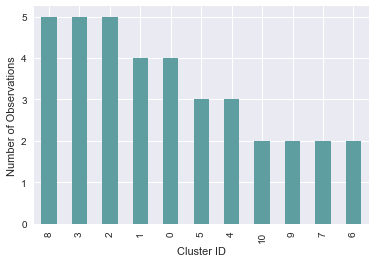

In [42]:
c_11 = cluster_text(chap_corp_vec, nclusters=11)

In [43]:
metrics.cluster.silhouette_score(np.dot(chap_corp_vec,chap_corp_vec.T), labels=c_11.labels_)

0.13435737408344714

In [44]:
[c_11.labels_[a] for a in [0,5,8, 30 ]]

[9, 1, 1, 2]

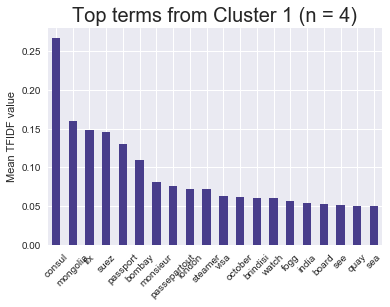

In [45]:
plot_single_cluster_tfidf_terms(c_11, vectorizer, chap_corp_vec, n_terms=20, cluster_id = 1)

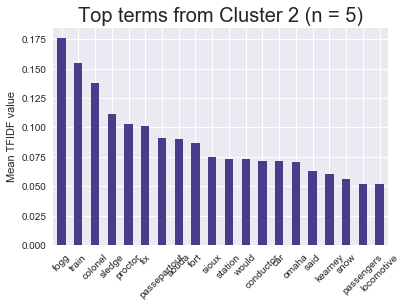

In [46]:
plot_single_cluster_tfidf_terms(c_11, vectorizer, chap_corp_vec, n_terms=20, cluster_id = 2)

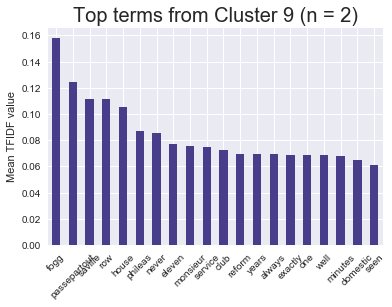

In [47]:
plot_single_cluster_tfidf_terms(c_11, vectorizer, chap_corp_vec, n_terms=20, cluster_id=9)

# Can we compare one document to another?

In [48]:
def setup_document_list(fname, train=True):
    pg_text = []
    book_chapters = []
    if train:
        tval = 1
    else:
        tval = 0
    # ingest meta_file
    df = pd.read_csv(fname)
    for i, row in df[df.train==tval].iterrows():
        bid = (row.file).split('/')[1].rstrip('.txt').split('-')[0]
        #print(bid, row.file)
        raw_text = load_pg_text(row.file)  
        print(len(raw_text), row.author, row.book)
        chapters = split_into_chapters(raw_text, int(bid), key_word=row.breakword, authorname=row.author, bookname=row.book)
        print("We split {b} into {n} chapters.".format(b=row.book, n=len(chapters)))
        book_chapters.append(len(chapters))
        pg_text.append(chapters)
    
    return pg_text, df, book_chapters

In [49]:
pg_text, df, book_chapters = setup_document_list('document_listing.txt')


8013 Verne 80days
We split 80days into 37 chapters.
19214 Verne Leagues
We split Leagues into 47 chapters.
13036 Austen Pride
We split Pride into 61 chapters.
16242 Austen Emma
We split Emma into 55 chapters.
12691 Doyle Return
We split Return into 13 chapters.
11942 Doyle Holmes
We split Holmes into 12 chapters.


In [50]:
pg_text_test, df2, bk_ch2 = setup_document_list('document_listing.txt', train=False)

9595 Verne Journey
We split Journey into 45 chapters.
12822 Austen Sense
We split Sense into 50 chapters.
6833 Doyle Hound
We split Hound into 15 chapters.


## Preprocess all the text in each of the chapters to be input into a TF-IDF formulation:
* tokenize
* remove stop words
* remove punctuation

In [51]:
clean_chapters = []
clean_corpus = []
clean_by_book =[]
book_info = []
for book in pg_text:
    by_book = []
    for k,ch in enumerate(book):
        new_text = " ".join([token for token in nltk_tokenize(ch.text)])
        clean_chapter = Chapter(ch.name,ch.title, new_text, ch.author, ch.book_id, k, ch.bookname)
        clean_chapters.append(clean_chapter)
        clean_corpus.append(new_text)
        by_book.append(new_text)
        if k == 0:
            book_info.append([ch.author, ch.bookname, ch.book_id])
    by_book = "".join([line for line in by_book])
    clean_by_book.append(by_book)

In [52]:
len(clean_corpus), len(clean_by_book)

(225, 6)

In [53]:
clean_by_book[0][:100]

'one master man phileas fogg lived 1872 7 saville row burlington gardens house sheridan died 1814 one'

In [54]:
clean_corpus[85][:60]

'bennet among earliest waited bingley always intended visit t'

## Two outputs: 
1. A corpus that is 1 row for each chapter
2. A corpus that is 1 row for each book

## let's start with the second one and see if we can determine differences between these authors


In [55]:
#df[df.train==1][['author','book',#
book_df = pd.DataFrame(book_info, columns=['Author','BookName','BookId'])
book_df['chapters']=book_chapters
#book_df

## Start with a _tf-idf_ vectorizer 

In [56]:
tfidf_vectorizer=TfidfVectorizer()
tfidf_by_book_vec = tfidf_vectorizer.fit_transform(clean_by_book)
tfidf_by_book_feature_names = tfidf_vectorizer.get_feature_names()

In [57]:
np.shape(tfidf_by_book_vec), len(tfidf_by_book_feature_names)

((6, 22242), 22242)

In [58]:
tf_book_feature_names[-8:]

NameError: name 'tf_book_feature_names' is not defined

## this is the dimension of our Document to Word matrix
6 by 22242

In [ ]:
b2b_TF_dist = np.dot(tfidf_by_book_vec, tfidf_by_book_vec.T).toarray()

In [ ]:
sns.heatmap(b2b_TF_dist,cmap='Blues')

In [ ]:
book_df

If you squint you might be able to guess that 4 & 5 (Doyle) are closest with 2 & 3 (Austen) are next closest.

### Retry at Chapter-level

In [ ]:
chapter_tfidf_vectorizer=TfidfVectorizer()
chapter_tfidf_vec = chapter_tfidf_vectorizer.fit_transform(clean_corpus)
chapter_tfidf_feature_names = chapter_tfidf_vectorizer.get_feature_names()

In [ ]:
len(chapter_tfidf_feature_names)

In [ ]:
c2c_TF_dist = np.dot(chapter_tfidf_vec, chapter_tfidf_vec.T).toarray()
sns.heatmap(c2c_TF_dist,cmap='Blues')
ch_boundaries = book_df.chapters.cumsum().values.tolist()
ch_boundaries.insert(0,0)
total = max(ch_boundaries)
for i,v in enumerate(ch_boundaries):
    if v != total:
        w = ch_boundaries[i+1]
        #for v in book_df.chapters.cumsum().values():
        
        plt.axhline(y=v, xmin=v/total, xmax=w/total,color='k')
        plt.axhline(y=w, xmin=v/total, xmax=w/total,color='k')
        plt.axvline(x=v, ymin=1-v/total, ymax=1-w/total,color='k')
        plt.axvline(x=w, ymin=1-v/total, ymax=1-w/total,color='k')
    

## This is cool $\rightarrow$ chapters of contiguous books are more self-similar 
## But harder to see similarities between authors (particularly Verne)

# This is all well and good.
* I've shown that I can group text into similar clusters and identify the top words (features) in each cluster. 

## However is there more we can do?

## What about <font color=indianred> Topic Modeling </font>?

Topic Modeling attempts to use machine learning to infer some sort of abstract "topics" within a collection of documents. It works by identifying informative collocation on our bag of words corpus. There are different ways to approach determining these topics. Two of the most common are _LDA_ and _NMF_. The Topic Modeling process thus assigns documents to a mixture of these topics and thus words can be associated to varying degrees into these different topics. 


### LDA: Latent Dirichlet Allocation is a probabalistic graphical model
* Note in ML LDA can also represent not to be confused with Linear Discriminate Analysis which is a method to characterize/distinguish between multiple classes.
* <blockquote> Latent Dirichlet allocation (LDA) is a generative probabilistic model of a corpus. The basic idea is
that documents are represented as random mixtures over latent topics, where each topic is characterized
by a distribution over words.
    
    -- Blei, Ng & Jordan J Machine Learning Research 3 (2003) 993-1022 [Latent Dirichlet Allocation](http://ai.stanford.edu/~ang/papers/jair03-lda.pdf)</blockquote> 

* In `python`, LDA is implemented in the goto ML library, `sklearn`. However the best python implementation (in terms of speed and scalability) is `Gensim`.


### NMF: Non-negative Matrix Factorization just uses straightforward linear algebra
* Implemented in  `sklearn`
* The document-word matrix, $\bf{D}$, is factorized into two matrices:, $\bf{T}$ and $\bf{W}$ as 
\begin{equation}
\bf{D} = \bf{T} \bf{W}
\end{equation}

* Effectively one can think of this as a dimensional reduction, projecting the  document-word matrix $\bf{D}$ into a document-topic matrix $\bf{T}$ useful for assessing similarities and gaining some idea of what the document is about and topic-word matrix $\bf{W}$  is generated in the process.

### <font color=dodgerblue> What is the  catch?</font> You have to specify the number of topics to assign.


## Apply both

In [59]:
n_features=2000

# Use it-idf
tfidf_vectorizer=TfidfVectorizer(max_df=0.95, min_df=2,max_features=n_features)
tfidf_book_vec = tfidf_vectorizer.fit_transform(clean_by_book)
tfidf_book_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=n_features, stop_words='english')
tf_book_vec = tf_vectorizer.fit_transform(clean_by_book)
tf_book_feature_names = tf_vectorizer.get_feature_names()


In [60]:
tfidf_book_vec.shape, tf_book_vec.shape

((6, 2000), (6, 2000))

In [61]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

no_topics = 3

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf_book_vec)

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=25, learning_method='online', 
                                learning_offset=50.,random_state=121).fit(tf_book_vec)


In [62]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {d}:".format(d=topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
print("\n NMF topics")
display_topics(nmf, tfidf_book_feature_names, no_top_words)
print("\n Now for LDA topics")
display_topics(lda, tf_book_feature_names, no_top_words)


 NMF topics
Topic 0:
holmes watson sherlock shall lestrade street chair police cried crime
Topic 1:
mrs elizabeth jane harriet shall sister mother pleasure frank aunt
Topic 2:
ned canadian replied professor ocean surface waves seas ve 000

 Now for LDA topics
Topic 0:
mrs elizabeth jane harriet shall sister mother pleasure frank feelings
Topic 1:
holmes shall watson cried street sherlock chair lestrade police station
Topic 2:
ned replied canadian professor surface seas ocean 000 waves waters


In [63]:
nmf_doctopic = nmf.transform(tfidf_book_vec)
nmf_doctopic#/np.sum(nmf_doctopic,axis=1,keepdims=True)

array([[0.        , 0.        , 0.042202  ],
       [0.        , 0.        , 1.20962826],
       [0.        , 0.82576388, 0.        ],
       [0.        , 0.82298039, 0.        ],
       [0.82384161, 0.        , 0.        ],
       [0.778778  , 0.        , 0.        ]])

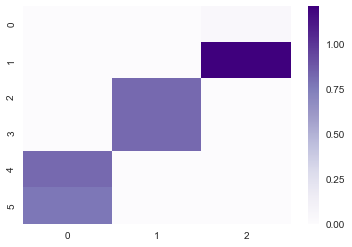

In [64]:
sns.heatmap(nmf_doctopic,cmap='Purples')#plt.xticks([1,2,3],['Topic 0', 'Topic 1','Topic 2'])

In [65]:
lda_doctopic = lda.transform(tf_book_vec)
[np.round(x,2) for x in lda_doctopic]#/np.sum(lda_doctopic,axis=1,keepdims=True)

[array([0.  , 0.81, 0.19]),
 array([0., 0., 1.]),
 array([1., 0., 0.]),
 array([1., 0., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.])]

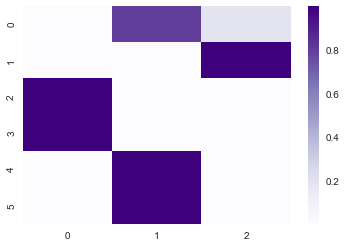

In [66]:
sns.heatmap(lda_doctopic,cmap='Purples')#plt.xticks([1,2,3],['Topic 0', 'Topic 1','Topic 2'])

In [67]:
def stack_plot_topics_per_instance(doctopic,doclist):
    plots = []
    N,K = doctopic.shape
    ind = np.arange(N)
    width=0.5
    full_height=np.zeros(N)
    for k in range(K):
        color = plt.cm.coolwarm(k/K, 1)
        if k == 0:
            p = plt.bar(ind, doctopic[:, k], width, color=color)
        else:
            p = plt.bar(ind, doctopic[:, k], width, bottom=full_height, color=color)
        full_height += doctopic[:, k]
        plots.append(p)
    plt.ylim((0,1))
    plt.ylabel('Topics')
    plt.title('Topics in novels')
    plt.xticks(ind+width/2, doclist)
    plt.yticks(np.arange(0, 1, 10))
    topic_labels = ['Topic #{}'.format(k) for k in range(K)]
    plt.legend([p[0] for p in plots], topic_labels)
    plt.show()


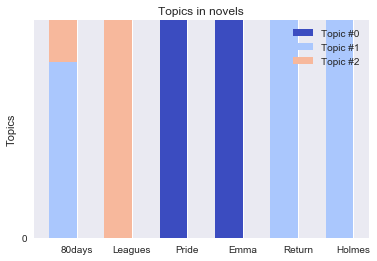

In [68]:
stack_plot_topics_per_instance(lda_doctopic,book_df.BookName.values.tolist())

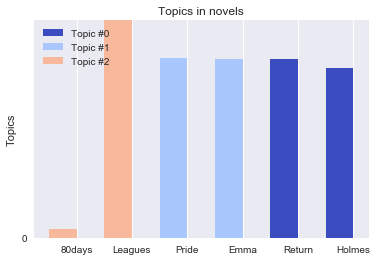

In [69]:
stack_plot_topics_per_instance(nmf_doctopic, book_df.BookName.values.tolist())

In [70]:
def plot_lda_topic_words(lda, topic_id, n_terms=20, terms=None):
    #if type(lda)=="<class 'gensim.models.ldamodel.LdaModel'":
    try:
        df = pd.DataFrame(lda.show_topic(topic_id,n_terms), columns=['term','weight']).set_index('term')
        
    except AttributeError:
        data = [(terms[i],lda.components_[topic_id][i] ) for i in lda.components_[topic_id].argsort()[:-n_terms -1:-1]]
        df =pd.DataFrame(data, columns=['term','weight']).set_index('term')
    
    df.plot(kind='bar')
    plt.title('Topic {d}'.format(d=str(topic_id)))
    #else:
    #    print("sorry not operational for type {} yet".format(type(lda)))
    
    return df

,weight
term,
holmes,919.073024
shall,223.424685
watson,220.020867
cried,137.107710
street,133.245540
sherlock,127.475222
chair,114.710897
lestrade,108.705065
police,97.813462


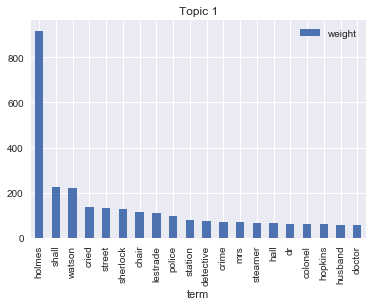

In [71]:
plot_lda_topic_words(lda, 1, n_terms=20, terms=tf_book_feature_names)

# Better visualization: pyLDAvis

In [72]:
import pyLDAvis as vis
vis.enable_notebook()
import pyLDAvis.sklearn
import pyLDAvis.gensim

In [73]:
pyLDAvis.sklearn.prepare(lda, tf_book_vec, tf_vectorizer)

C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
1      36.298829        1       1  0.018856 -0.130429
0      35.294468        1       2 -0.218989  0.056413
2      28.406703        1       3  0.200133  0.074016, topic_info=     Category         Freq       Term        Total  loglift  logprob
term                                                                
886   Default  1143.000000     holmes  1143.000000  30.0000  30.0000
1181  Default  1066.000000        mrs  1066.000000  29.0000  29.0000
601   Default   602.000000  elizabeth   602.000000  28.0000  28.0000
1002  Default   566.000000       jane   566.000000  27.0000  27.0000
1196  Default   433.000000        ned   433.000000  26.0000  26.0000
860   Default   482.000000    harriet   482.000000  25.0000  25.0000
255   Default   226.000000   canadian   226.000000  24.0000  24.0000
1938  Default   275.000000     watson   275.000000  23.0000  23.0000
1771  Default   190.000000    surface   190.000000  22.0000  22.0000
1601  Default   637.000000      shall   637.000000  21.0000  21.0000
1235  Default   178.000000      ocean   178.000000  20.0000  20.0000
1576  Default   182.000000       seas   182.000000  19.0000  19.0000
1388  Default   245.000000  professor   245.000000  18.0000  18.0000
1491  Default   547.000000    replied   547.000000  17.0000  17.0000
1939  Default   169.000000      waves   169.000000  16.0000  16.0000
0     Default   170.000000        000   170.000000  15.0000  15.0000
1937  Default   162.000000     waters   162.000000  14.0000  14.0000
724   Default   164.000000       fish   164.000000  13.0000  13.0000
1654  Default   271.000000     sister   271.000000  12.0000  12.0000
481   Default   143.000000    degrees   143.000000  11.0000  11.0000
1614  Default   159.000000   sherlock   159.000000  10.0000  10.0000
707   Default   189.000000   feelings   189.000000   9.0000   9.0000
1618  Default   164.000000       ship   164.000000   8.0000   8.0000
767   Default   225.000000      frank   225.000000   7.0000   7.0000
1908  Default   177.000000         ve   177.000000   6.0000   6.0000
1335  Default   223.000000   pleasure   223.000000   5.0000   5.0000
1063  Default   136.000000   lestrade   136.000000   4.0000   4.0000
997   Default   123.000000     island   123.000000   3.0000   3.0000
915   Default   116.000000        ice   116.000000   2.0000   2.0000
146   Default   139.000000       aunt   139.000000   1.0000   1.0000
...       ...          ...        ...          ...      ...      ...
481    Topic3   136.463928    degrees   143.983399   1.2049  -4.9545
1937   Topic3   153.687210     waters   162.155984   1.2049  -4.8357
1939   Topic3   160.585453      waves   169.636375   1.2037  -4.7918
32     Topic3    51.108406     aboard    53.995058   1.2036  -5.9366
1771   Topic3   180.090052    surface   190.361056   1.2031  -4.6771
0      Topic3   161.172721        000   170.665072   1.2013  -4.7881
1627   Topic3    56.372707      shore    59.722134   1.2008  -5.8386
725    Topic3    27.639827  fishermen    29.363579   1.1980  -6.5513
1628   Topic3    35.722606     shores    37.954462   1.1979  -6.2948
1607   Topic3    38.235084     sharks    40.757812   1.1947  -6.2268
915    Topic3   108.985439        ice   116.516244   1.1917  -5.1794
724    Topic3   153.539959       fish   164.992022   1.1866  -4.8366
848    Topic3    54.167689       gulf    57.806879   1.1935  -5.8785
997    Topic3   113.344453     island   123.222979   1.1750  -5.1402
89     Topic3   107.584119     animal   118.427724   1.1625  -5.1923
495    Topic3    73.997701     depths    80.514036   1.1741  -5.5665
1619   Topic3    54.857438      ships    58.756356   1.1899  -5.8658
1618   Topic3   140.848651       ship   164.639522   1.1025  -4.9229
1388   Topic3   196.865788  professor   245.948375   1.0359  -4.5881
1908   Topic3   143.326189         ve   177.819607   1.0429  -4.9055
1333   Topic3    84.942661   p

In [74]:
pyLDAvis.sklearn.prepare(nmf, tfidf_book_vec, tfidf_vectorizer)

C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]
C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
2      43.999799        1       1 -0.402615 -0.051229
0      28.255070        1       2  0.252137 -0.278720
1      27.745131        1       3  0.150478  0.329949, topic_info=     Category       Freq        Term      Total  loglift  logprob
term                                                             
877   Default  11.000000      holmes  11.000000  30.0000  30.0000
1172  Default   4.000000         mrs   4.000000  29.0000  29.0000
596   Default   3.000000   elizabeth   3.000000  28.0000  28.0000
1188  Default   5.000000         ned   5.000000  27.0000  27.0000
998   Default   2.000000        jane   2.000000  26.0000  26.0000
846   Default   2.000000     harriet   2.000000  25.0000  25.0000
1937  Default   1.000000      watson   1.000000  24.0000  24.0000
263   Default   2.000000    canadian   2.000000  23.0000  23.0000
1597  Default   1.000000    sherlock   1.000000  22.0000  22.0000
1380  Default   1.000000   professor   1.000000  21.0000  21.0000
1585  Default   2.000000       shall   2.000000  20.0000  20.0000
1231  Default   1.000000       ocean   1.000000  19.0000  19.0000
1056  Default   0.000000    lestrade   0.000000  18.0000  18.0000
1760  Default   1.000000     surface   1.000000  17.0000  17.0000
1938  Default   1.000000       waves   1.000000  16.0000  16.0000
1638  Default   0.000000      sister   0.000000  15.0000  15.0000
1560  Default   1.000000        seas   1.000000  14.0000  14.0000
1907  Default   1.000000          ve   1.000000  13.0000  13.0000
1481  Default   2.000000     replied   2.000000  12.0000  12.0000
0     Default   1.000000         000   1.000000  11.0000  11.0000
1730  Default   0.000000      street   0.000000  10.0000  10.0000
1601  Default   0.000000        ship   0.000000   9.0000   9.0000
721   Default   0.000000        fish   0.000000   8.0000   8.0000
1936  Default   0.000000      waters   0.000000   7.0000   7.0000
292   Default   0.000000       chair   0.000000   6.0000   6.0000
1335  Default   0.000000      police   0.000000   5.0000   5.0000
1161  Default   0.000000      mother   0.000000   4.0000   4.0000
993   Default   0.000000      island   0.000000   3.0000   3.0000
1330  Default   0.000000    pleasure   0.000000   2.0000   2.0000
760   Default   0.000000       frank   0.000000   1.0000   1.0000
...       ...        ...         ...        ...      ...      ...
345    Topic3   0.086209     colonel   0.086209   1.2821  -5.5243
464    Topic3   0.255421    daughter   0.255421   1.2821  -4.4382
465    Topic3   0.043404   daughters   0.043404   1.2821  -6.2105
796    Topic3   0.064929        girl   0.064929   1.2821  -5.8078
846    Topic3   2.784621     harriet   2.784621   1.2821  -2.0492
1876   Topic3   0.102422       uncle   0.102422   1.2821  -5.3520
992    Topic3   0.103659    isabella   0.103659   1.2821  -5.3400
83     Topic3   0.006441     amiable   0.006441   1.2821  -8.1183
998    Topic3   2.821775        jane   2.821775   1.2821  -2.0359
153    Topic3   0.432376        aunt   0.432376   1.2821  -3.9118
1106   Topic3   0.078664    marriage   0.078664   1.2821  -5.6159
1841   Topic3   0.202315     towards   0.202315   1.2821  -4.6712
1161   Topic3   0.507694      mother   0.507694   1.2821  -3.7512
1655   Topic3   0.075183       smith   0.075183   1.2821  -5.6611
1330   Topic3   0.492185    pleasure   0.492185   1.2821  -3.7822
1639   Topic3   0.242067     sisters   0.242067   1.2821  -4.4918
1417   Topic3   0.227180    randalls   0.227180   1.2821  -4.5553
67     Topic3   0.051876   agreeable   0.051876   1.2821  -6.0322
139    Topic3   0.062413      assure   0.062413   1.2821  -5.8473
1638   Topic3   0.824070      sister   0.824070   1.2821  -3.2668
1090   Topic3   0.129236       lucas   0.129236   1.2821  -5.1194
143    Topic3   0.148198  attachment   0.148198   1.2821  -4.9825
760    Topic3   0.472396       frank   0.472396   1.2821 

## ingest the test data & compare

In [75]:
testclean_chapters = []
testclean_corpus = []
testclean_by_book =[]
#book_info = []
for book in pg_text_test:
    test_by_book = []
    for k,ch in enumerate(book):
        new_text = " ".join([token for token in nltk_tokenize(ch.text)])
        testclean_chapter = Chapter(ch.name,ch.title, new_text, ch.author, ch.book_id, k, ch.bookname)
        testclean_chapters.append(testclean_chapter)
        testclean_corpus.append(new_text)
        test_by_book.append(new_text)
        if k == 0:
            print(ch.bookname, ch.author)
        
    test_by_book = "".join([line for line in test_by_book])
    testclean_by_book.append(test_by_book)

Journey Verne
Sense Austen
Hound Doyle


In [76]:
test_by_book_vec = tfidf_vectorizer.transform(testclean_by_book)

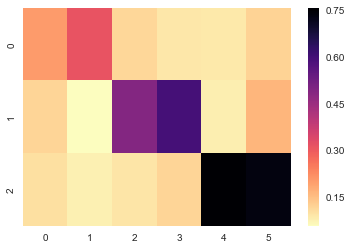

In [77]:
sns.heatmap(np.dot(test_by_book_vec,tfidf_book_vec.T).todense(),cmap='magma_r')

## Not so bad at assigning the best similarity for each author

## Let's retry with each chapter 
use `clean_corpus`

In [78]:
ctf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=n_features)
ctf_book_vec = ctf_vectorizer.fit_transform(clean_corpus)
ctf_book_feature_names = ctf_vectorizer.get_feature_names()

In [79]:
chap_lda14 = LatentDirichletAllocation(n_components=14, max_iter=25, learning_method='online', 
                                                                learning_offset=50.,random_state=11).fit(ctf_book_vec)


In [80]:
chap_lda_doctopic = chap_lda14.transform(ctf_book_vec)
#[np.round(x,2) for x in chap_lda_doctopic]
#chap_lda_doctopic

In [81]:
pyLDAvis.sklearn.prepare(chap_lda14,  ctf_book_vec, ctf_vectorizer)

C:\Users\ARADER\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
8      41.252844        1       1 -0.132750 -0.041642
2      28.606987        1       2 -0.082923  0.063313
4      19.607530        1       3  0.099369  0.079991
11      8.331041        1       4  0.001584  0.120740
0       2.140351        1       5 -0.134695  0.013408
13      0.006805        1       6  0.030449 -0.007636
9       0.006805        1       7  0.028330 -0.016589
12      0.006805        1       8  0.019943 -0.026375
7       0.006805        1       9  0.028108 -0.019769
10      0.006805        1      10  0.022268 -0.029206
3       0.006805        1      11  0.024928 -0.027785
1       0.006805        1      12  0.027525 -0.030509
6       0.006805        1      13  0.033876 -0.038150
5       0.006805        1      14  0.033988 -0.039792, topic_info=     Category         Freq       Term        Total  loglift  logprob
term                                                                
1513  Default  2329.000000       said  2329.000000  30.0000  30.0000
244   Default   849.000000    captain   849.000000  29.0000  29.0000
1184  Default   647.000000   nautilus   647.000000  28.0000  28.0000
1169  Default  1138.000000        mrs  1138.000000  27.0000  27.0000
1139  Default   995.000000       miss   995.000000  26.0000  26.0000
852   Default  1219.000000     holmes  1219.000000  25.0000  25.0000
533   Default   573.000000  elizabeth   573.000000  24.0000  24.0000
1038  Default  1128.000000     little  1128.000000  23.0000  23.0000
1173  Default  1411.000000       must  1411.000000  22.0000  22.0000
1869  Default  1130.000000         us  1130.000000  21.0000  21.0000
1929  Default  1361.000000       well  1361.000000  20.0000  20.0000
1082  Default  1340.000000        man  1340.000000  19.0000  19.0000
1170  Default  1133.000000       much  1133.000000  18.0000  18.0000
1867  Default  1223.000000       upon  1223.000000  17.0000  17.0000
682   Default   598.000000       fogg   598.000000  16.0000  16.0000
1849  Default   985.000000        two   985.000000  15.0000  15.0000
353   Default   482.000000    conseil   482.000000  14.0000  14.0000
971   Default  1050.000000       know  1050.000000  13.0000  13.0000
1195  Default   491.000000       nemo   491.000000  12.0000  12.0000
537   Default   937.000000       emma   937.000000  11.0000  11.0000
575   Default   981.000000      every   981.000000  10.0000  10.0000
948   Default   590.000000       jane   590.000000   9.0000   9.0000
1791  Default  1008.000000      think  1008.000000   8.0000   8.0000
1546  Default  1054.000000        see  1054.000000   7.0000   7.0000
1809  Default  1056.000000       time  1056.000000   6.0000   6.0000
1025  Default   853.000000       like   853.000000   5.0000   5.0000
1535  Default   521.000000        sea   521.000000   4.0000   4.0000
1199  Default   948.000000      never   948.000000   3.0000   3.0000
772   Default  1003.000000       good  1003.000000   2.0000   2.0000
1050  Default   757.000000       long   757.000000   1.0000   1.0000
...       ...          ...        ...          ...      ...      ...
1184  Topic14     0.016654   nautilus   647.383162  -0.9728  -6.8708
797   Topic14     0.009782       gulf    60.126371   0.8715  -7.4030
1126  Topic14     0.012217     meters   204.591124  -0.1307  -7.1806
1195  Topic14     0.014083       nemo   491.227595  -0.8645  -7.0385
87    Topic14     0.010976     animal   124.119425   0.2619  -7.2878
649   Topic14     0.012113       feet   218.742464  -0.2062  -7.1892
1942  Topic14     0.013002      whose   395.117097  -0.7266  -7.1184
1469  Topic14     0.013222    replied   571.098657  -1.0782  -7.1016
1917  Topic14     0.011162     waters   170.402935  -0.0382  -7.2709
1173  Topic14     0.014834       must  1411.029775  -1.8677  -6.9866
1025  Topic14     0.013857       like   853.294225  -1.4328  -7.0547
1849  Topic14     0.013574        two   985.014139  -1.59

In [ ]:
import en_core_web_sm as spacy_en
nlp = spacy_en.load()

In [83]:
def rejoin_chapter_text(raw_text):
    bookname = raw_text[0].bookname
    by_chapter_text = [ch.text for ch in raw_text]
    print("Confirming that there were {n} chapters in {b}.".format(n=len(by_chapter_text),b=bookname))
    book_text = " ".join([chapt for chapt in by_chapter_text])
    book_doc = nlp(book_text)
    #How many sentences are in the book ?
    sentences = [s for s in book_doc.sents]   
    #league_character_offsets = get_character_offsets(leagues_doc)
    print("{M} sentences in this book.".format(M=len(sentences)))
    return book_doc
        

In [84]:
hound_doc = rejoin_chapter_text(pg_text_test[2])

Confirming that there were 15 chapters in Hound.
3936 sentences in this book.


In [85]:
from collections import defaultdict
NUM_BINS=30
def get_character_offsets(doc):
    """
    For every character in a `doc` collect all the occurrences offsets and store them into a list.
    The function returns a dictionary that has actor lemma as a key and list of occurences as a value for every character.
    :param doc: Spacy NLP parsed document
    :return: dict object in form
        {'elizabeth': [123, 543, 4534], 'darcy': [205, 2111]}
    """

    character_offsets = defaultdict(list)
    for ent in doc.ents:
        if ent.label_ == 'PERSON' and ent.lemma_!= '':
            character_offsets[ent.lemma_].append(ent.start)

    return dict(character_offsets)



def plot_character_timeseries(character_offsets, character_labels, normalization_constant=None):
    """
    Plot characters' personal names specified in `character_labels` list as time series.
    :param character_offsets: dict object in form {'elizabeth': [123, 543, 4534], 'darcy': [205, 2111]}
    :param character_labels: list of strings that should match some of the keys in `character_offsets`
    :param normalization_constant: int
    """
    x = [character_offsets[character_label] for character_label in character_labels]

    with plt.style.context('fivethirtyeight'):
        plt.figure()
        n, bins, patches = plt.hist(x, NUM_BINS, label=character_labels)
        plt.clf()

        ax = plt.subplot(111)
        for i, a in enumerate(n):
            ax.plot([float(x) / (NUM_BINS - 1) for x in range(len(a))], a, label=character_labels[i])

        matplotlib.rcParams['axes.prop_cycle'] = cycler(color=['r', 'k', 'c', 'b', 'y', 'm', 'g', '#54a1FF'])
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        
def get_character_adjectives(doc, character_lemma):
    """
    Find all the adjectives related to `character_lemma` in `doc`
    :param doc: Spacy NLP parsed document
    :param character_lemma: string object
    :return: list of adjectives related to `character_lemma`
    """

    adjectives = []
    for ent in doc.ents:
        if ent.lemma_ == character_lemma:
            for token in ent.subtree:
                if token.pos_ == 'ADJ':  # Replace with if token.dep_ == 'amod':
                    adjectives.append(token.lemma_)

    for ent in doc.ents:
        if ent.lemma_ == character_lemma:
            if ent.root.dep_ == 'nsubj':
                for child in ent.root.head.children:
                    if child.dep_ == 'acomp':
                        adjectives.append(child.lemma_)
                        
    adjectives = filter(lambda word: word != '-PRON-', adjectives)
    
    adj = Counter(adjectives)
    

    return adj

In [86]:
hound_characters = get_character_offsets(hound_doc)

In [87]:
[(k,len(v)) for k,v in hound_characters.items() if len(v) > 20]

[('sherlock holmes', 31),
 ('watson', 107),
 ('holmes', 147),
 ('mortimer', 70),
 ('charles', 78),
 ('henry baskerville', 23),
 ('stapleton', 49),
 ('henry', 130)]

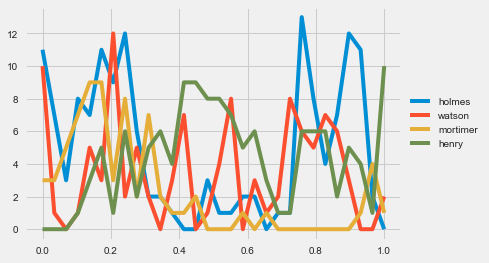

In [88]:
plot_character_timeseries(hound_characters, ['holmes','watson','mortimer','henry'])

In [89]:
for character in ['holmes', 'watson','mortimer','henry']:
    print(character)
    print(get_character_adjectives(hound_doc, character).keys())

holmes
dict_keys(['dear', 'all', 'next', 'silent', 'afoot'])
watson
dict_keys(['dear', 'which', 'alternative', 'long', 'short', 'quick', 'honest', 'ugly', 'dangerous', 'more', 'good', 'wise'])
mortimer
dict_keys(['several', 'strong', 'round', 'visible'])
henry
dict_keys(['queer', 'old', 'which', 'angry', 'other', 'secret', 'particular', 'deep', 'unprotected', 'interested', 'pleased', 'insensible'])


In [90]:
emma_doc = rejoin_chapter_text(pg_text[3])
emma_characters = get_character_offsets(emma_doc)

Confirming that there were 55 chapters in Emma.
11961 sentences in this book.


In [91]:
[(k,len(v)) for k,v in emma_characters.items() if len(v) > 60]


[('woodhouse', 138),
 ('emma', 735),
 ('weston', 418),
 ('isabella', 67),
 ('knightley', 298),
 ('elton', 361),
 ('churchill', 65),
 ('frank churchill', 137),
 ('perry', 79),
 ('miss bates', 96),
 ('harriet', 319),
 ('jane fairfax', 76),
 ('jane', 178)]

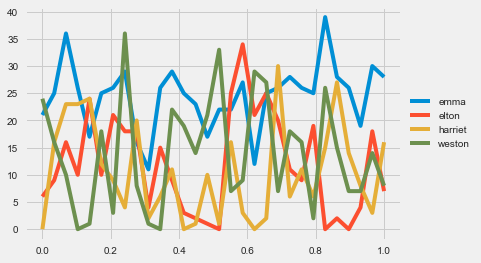

In [92]:
plot_character_timeseries(emma_characters, ['emma', 'elton','harriet', 'weston'])

In [ ]:
from gensim import models,  similarities, corpora
# gensim model uses a corpus and dictionary
dictionary = corpora.Dictionary([a.split() for a in clean_corpus])
corpus = [dictionary.doc2bow(text) for text in [a.split() for a in clean_corpus]]
#corpus = " ".join([word for word in by_book_vec if word in tf_feature_names])
lda_model = models.LdaModel(corpus, id2word=dictionary, num_topics=20 )

In [ ]:
test_dictionary = corpora.Dictionary([a.split() for a in testclean_corpus])
test_corpus = [test_dictionary.doc2bow(text) for text in [a.split() for a in testclean_corpus]]

In [ ]:
pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)